In [1]:
import numpy as np
import cv2
import os
import scipy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
dataset_dir = 'data/'
mat_files = sorted([file for file in os.listdir(dataset_dir) if file.endswith('.mat')])
mat_files

# Specify inspection sequence
idx = 4
mat_data = scipy.io.loadmat(os.path.join(dataset_dir, mat_files[idx]))
image_sequence = np.float32(mat_data["imageArray"])
h, w, sequence_size = image_sequence.shape[0], image_sequence.shape[1], image_sequence.shape[2]

In [3]:
from scipy.signal import medfilt

def apply_median(pixel_signal):
    return medfilt(pixel_signal, kernel_size=3)

h, w, sequence_size = image_sequence.shape
imageMatrix = image_sequence.reshape(h * w, sequence_size)
imageMatrix = imageMatrix[:, 12:]

imageMatrix = np.apply_along_axis(apply_median, axis=1, arr=imageMatrix)

mean_vals = imageMatrix.mean(axis=1, keepdims=True)
normalized_data = imageMatrix - mean_vals

In [4]:
pca = PCA(n_components=10)
pca_result = pca.fit_transform(normalized_data)
pca_plot = pca_result
pca_images = pca_result.reshape(h, w, 10)
pca_images = [cv2.normalize(pca_images[:, :, i], None, 0, 1, cv2.NORM_MINMAX) for i in range(10)]

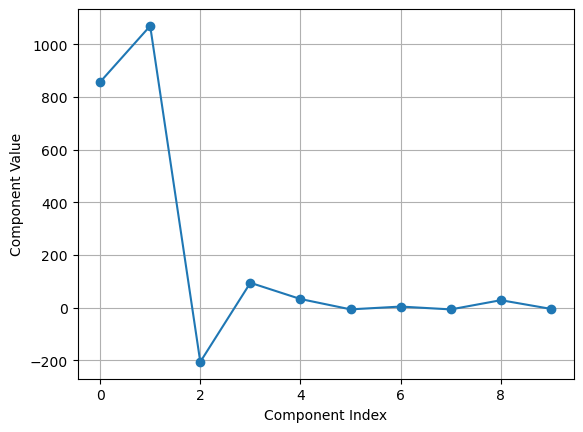

In [5]:
plt.plot(pca_plot[70000, :], marker='o')
plt.xlabel("Component Index")
plt.ylabel("Component Value")
plt.grid(True)
plt.show()

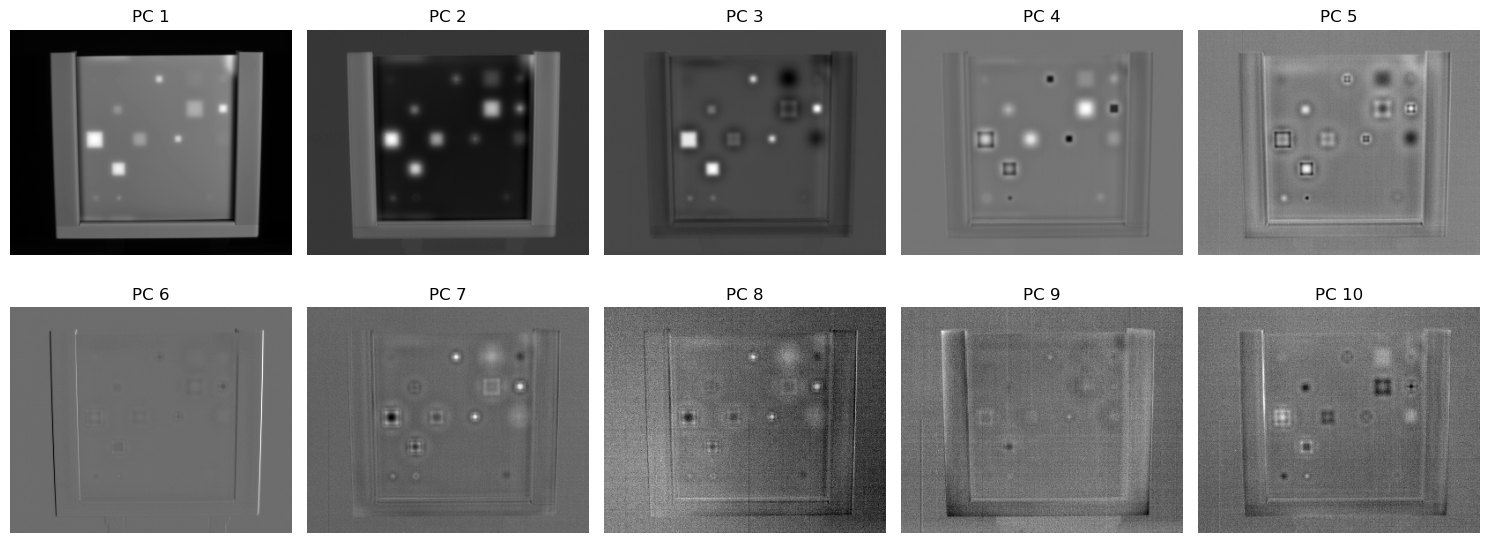

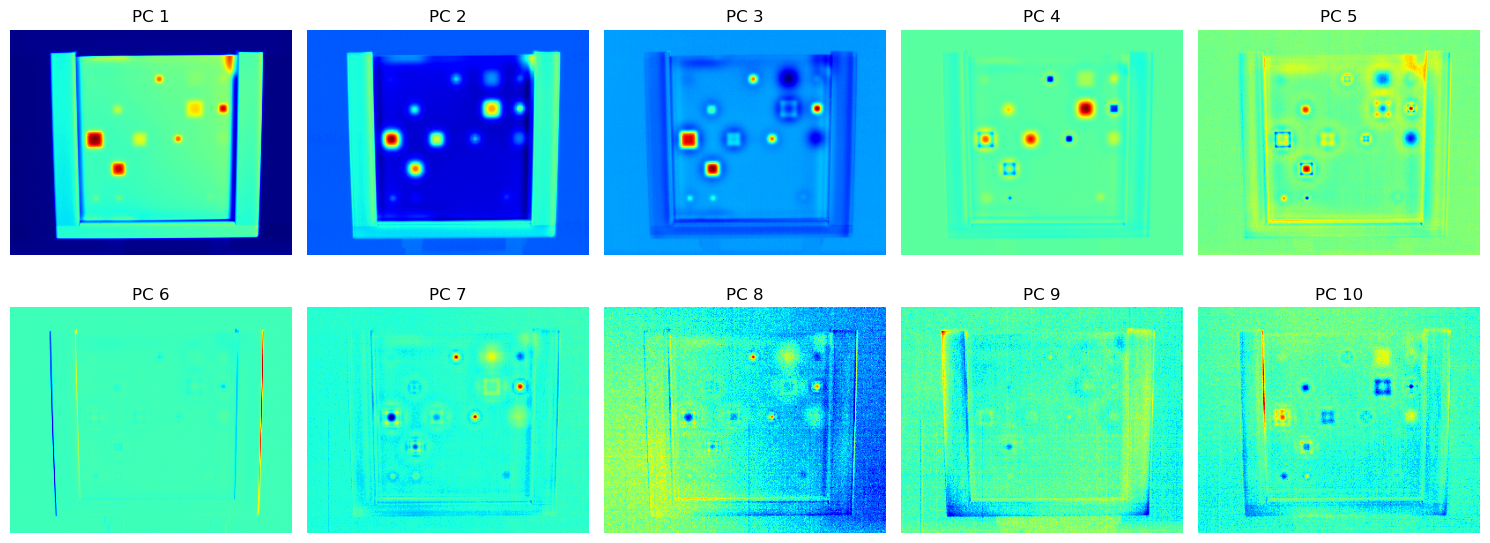

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca_images[i], cmap='gray')
    ax.set_title(f'PC {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(pca_images[i], cmap='jet')
    ax.set_title(f'PC {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()